# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [ ]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()


bill  bo  dave  louis  ricky
able                  1   0     0      1      2
absurdities           1   0     1      1      1
absurdities sharp     1   0     1      1      1
accurate              0   0     0      1      1
act                   4   0     4      0      0

In [ ]:
data.columns

Index(['bill', 'bo', 'dave', 'louis', 'ricky'], dtype='object')

In [ ]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'bill': [('like', 202),
  ('just', 150),
  ('right', 131),
  ('im', 107),
  ('know', 99),
  ('dont', 95),
  ('gonna', 77),
  ('got', 72),
  ('fucking', 71),
  ('yeah', 67),
  ('shit', 64),
  ('youre', 59),
  ('thats', 56),
  ('dude', 40),
  ('want', 36),
  ('think', 36),
  ('fuck', 36),
  ('people', 32),
  ('did', 31),
  ('hes', 31),
  ('guy', 30),
  ('didnt', 29),
  ('make', 28),
  ('come', 27),
  ('going', 26),
  ('thing', 26),
  ('theyre', 25),
  ('let', 24),
  ('theres', 24),
  ('little', 23)],
 'bo': [('able', 0),
  ('published', 0),
  ('proud', 0),
  ('protection', 0),
  ('property', 0),
  ('promise', 0),
  ('progressive', 0),
  ('program', 0),
  ('problem right', 0),
  ('problem', 0),
  ('probably', 0),
  ('private', 0),
  ('pretty', 0),
  ('pretend', 0),
  ('press', 0),
  ('president', 0),
  ('pounds', 0),
  ('pound', 0),
  ('population problem', 0),
  ('population', 0),
  ('pops', 0),
  ('popping', 0),
  ('pop', 0),
  ('poor', 0),
  ('pool', 0),
  ('political issues', 0),
  (

In [ ]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
able, published, proud, protection, property, promise, progressive, program, problem right, problem, probably, private, pretty, pretend
---
dave
like, know, said, just, im, shit, people, didnt, dont, time, thats, fuck, fucking, black
---
louis
like, just, know, dont, thats, youre, im, life, people, thing, gonna, hes, cause, theres
---
ricky
right, like, im, just, dont, know, said, yeah, fucking, got, say, youre, went, id
---


**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

words

['like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'think',
 'fuck',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'going',
 'thing',
 'theyre',
 'let',
 'theres',
 'little',
 'able',
 'published',
 'proud',
 'protection',
 'property',
 'promise',
 'progressive',
 'program',
 'problem right',
 'problem',
 'probably',
 'private',
 'pretty',
 'pretend',
 'press',
 'president',
 'pounds',
 'pound',
 'population problem',
 'population',
 'pops',
 'popping',
 'pop',
 'poor',
 'pool',
 'political issues',
 'political extremes',
 'political',
 'police',
 'public',
 'like',
 'know',
 'said',
 'just',
 'im',
 'shit',
 'people',
 'didnt',
 'dont',
 'time',
 'thats',
 'fuck',
 'fucking',
 'black',
 'man',
 'good',
 'got',
 'right',
 'gonna',
 'lot',
 'gay',
 'did',
 'hes',
 'yeah',
 'oh',
 'dont know',
 'come',
 'guys',
 'youre',
 'think',
 'like',
 'just',
 'know',
 'dont',
 'thats',
 'your

In [ ]:
top

['right',
 'like',
 'im',
 'just',
 'dont',
 'know',
 'said',
 'yeah',
 'fucking',
 'got',
 'say',
 'youre',
 'went',
 'id',
 'thats',
 'people',
 'didnt',
 'little',
 'joke',
 'theyre',
 'hes',
 'ive',
 'going',
 'thing',
 'years',
 'day',
 'theres',
 'saying',
 'big',
 'hed']

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 4),
 ('just', 4),
 ('right', 4),
 ('im', 4),
 ('know', 4),
 ('dont', 4),
 ('youre', 4),
 ('thats', 4),
 ('people', 4),
 ('hes', 4),
 ('didnt', 4),
 ('gonna', 3),
 ('got', 3),
 ('fucking', 3),
 ('yeah', 3),
 ('shit', 3),
 ('think', 3),
 ('fuck', 3),
 ('thing', 3),
 ('theyre', 3),
 ('theres', 3),
 ('did', 2),
 ('guy', 2),
 ('come', 2),
 ('going', 2),
 ('little', 2),
 ('said', 2),
 ('time', 2),
 ('good', 2),
 ('dont know', 2),
 ('dude', 1),
 ('want', 1),
 ('make', 1),
 ('let', 1),
 ('able', 1),
 ('published', 1),
 ('proud', 1),
 ('protection', 1),
 ('property', 1),
 ('promise', 1),
 ('progressive', 1),
 ('program', 1),
 ('problem right', 1),
 ('problem', 1),
 ('probably', 1),
 ('private', 1),
 ('pretty', 1),
 ('pretend', 1),
 ('press', 1),
 ('president', 1),
 ('pounds', 1),
 ('pound', 1),
 ('population problem', 1),
 ('population', 1),
 ('pops', 1),
 ('popping', 1),
 ('pop', 1),
 ('poor', 1),
 ('pool', 1),
 ('political issues', 1),
 ('political extremes', 1),
 ('political', 1),


In [ ]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'youre',
 'thats',
 'people',
 'hes',
 'didnt',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'think',
 'fuck',
 'thing',
 'theyre',
 'theres']

In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# print(stop_words)
# Convert the frozenset to a list
stop_words = list(stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
# data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [ ]:
stop_words


['many',
 'fill',
 'no',
 'somewhere',
 'herein',
 'describe',
 'just',
 'few',
 'amongst',
 'whether',
 'detail',
 'while',
 'un',
 'a',
 'besides',
 'people',
 'keep',
 'nowhere',
 'because',
 'dont',
 'nothing',
 'hereupon',
 'theyre',
 'never',
 'back',
 'everyone',
 'thin',
 'take',
 'whenever',
 'forty',
 'mill',
 'amoungst',
 'them',
 'moreover',
 'found',
 'everywhere',
 'top',
 'shit',
 'her',
 'their',
 'elsewhere',
 'yet',
 'being',
 'nevertheless',
 'in',
 'than',
 'sometimes',
 'youre',
 'from',
 'now',
 'other',
 'become',
 'same',
 'hence',
 'three',
 'ie',
 'be',
 'hundred',
 'us',
 'latter',
 'had',
 'de',
 'others',
 'twelve',
 'onto',
 'some',
 'has',
 'during',
 'own',
 'again',
 'off',
 'whereupon',
 'must',
 'anything',
 'through',
 'not',
 'hereafter',
 'our',
 'since',
 'see',
 'both',
 'myself',
 'all',
 'sincere',
 'everything',
 'didnt',
 'they',
 'two',
 'after',
 'are',
 'fuck',
 'became',
 'around',
 'wherever',
 'part',
 'even',
 'thereupon',
 'he',
 'int

In [ ]:
print(data_clean.columns)


Index(['transcript'], dtype='object')


In [ ]:
!pip install wordcloud


In [ ]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
wc

In [ ]:
data_clean

transcript
bill   all right thank you thank you very much thank ...
bo                                                      
dave   this is dave he tells dirty jokes for a living...
louis  introfade the music out lets roll hold there l...
ricky  hello hello how you doing great thank you wow ...

Skipping bo: No valid transcript data.


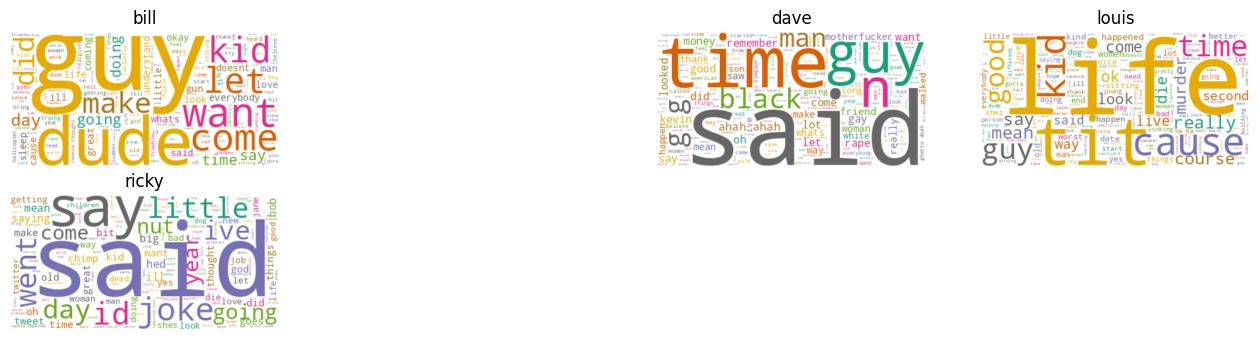

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['bill', 'bo', 'dave', 'louis', 'ricky']

# Iterate through each comedian in the dataset
for index, comedian in enumerate(data_clean.index):
    text = data_clean.loc[comedian, 'transcript']

    if not isinstance(text, str) or text.strip() == "":
        print(f"Skipping {comedian}: No valid transcript data.")
        continue

    wc.generate(text)  # Generate word cloud
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()


### Findings

* "Black", "man", "gay" could indicate discussions about race, identity, or social commentary, which aligns with Dave Chappelle’s comedic style.
* Bill's frequent use of "dude" and "guy" suggests a conversational or storytelling style, possibly focusing on interactions with people.

## Number of Words

### Analysis

In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

comedian  unique_words
1       bo             0
3    louis          1176
2     dave          1241
4    ricky          1277
0     bill          1505

In [ ]:
unique_list

[1505, 0, 1241, 1176, 1277]

In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

comedian  unique_words  total_words  run_times  words_per_minute
1       bo             0            0         59          0.000000
2     dave          1241         3743         80         46.787500
3    louis          1176         3421         60         57.016667
4    ricky          1277         4316         67         64.417910
0     bill          1505         5581         60         93.016667

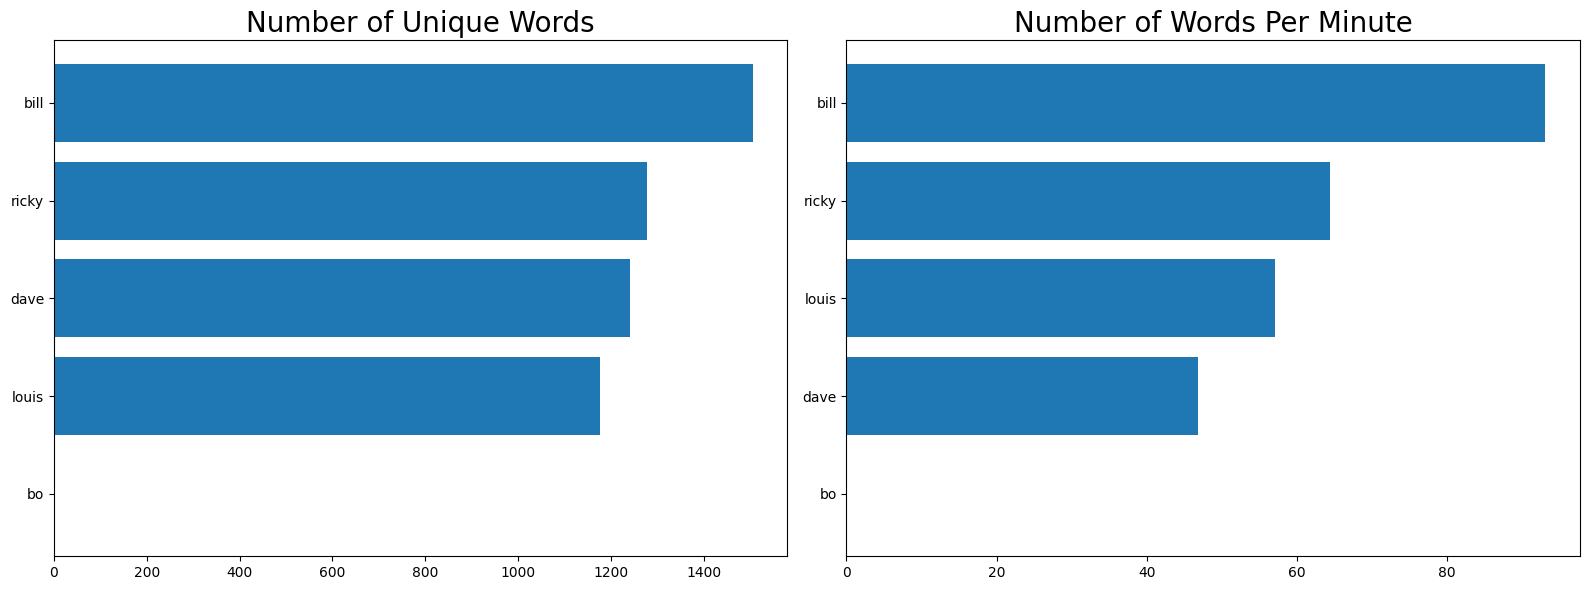

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais and Bill Burr use a lot of words in their comedy
   * Louis C.K. has a smaller vocabulary


* **Talking Speed**
   * Bill Burr talk fast


## Amount of Profanity

### Analysis

In [ ]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 4),
 ('just', 4),
 ('right', 4),
 ('im', 4),
 ('know', 4),
 ('dont', 4),
 ('youre', 4),
 ('thats', 4),
 ('people', 4),
 ('hes', 4),
 ('didnt', 4),
 ('gonna', 3),
 ('got', 3),
 ('fucking', 3),
 ('yeah', 3),
 ('shit', 3),
 ('think', 3),
 ('fuck', 3),
 ('thing', 3),
 ('theyre', 3),
 ('theres', 3),
 ('did', 2),
 ('guy', 2),
 ('come', 2),
 ('going', 2),
 ('little', 2),
 ('said', 2),
 ('time', 2),
 ('good', 2),
 ('dont know', 2),
 ('dude', 1),
 ('want', 1),
 ('make', 1),
 ('let', 1),
 ('able', 1),
 ('published', 1),
 ('proud', 1),
 ('protection', 1),
 ('property', 1),
 ('promise', 1),
 ('progressive', 1),
 ('program', 1),
 ('problem right', 1),
 ('problem', 1),
 ('probably', 1),
 ('private', 1),
 ('pretty', 1),
 ('pretend', 1),
 ('press', 1),
 ('president', 1),
 ('pounds', 1),
 ('pound', 1),
 ('population problem', 1),
 ('population', 1),
 ('pops', 1),
 ('popping', 1),
 ('pop', 1),
 ('poor', 1),
 ('pool', 1),
 ('political issues', 1),
 ('political extremes', 1),
 ('political', 1),


In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

f_word  s_word
bill      107      64
bo          0       0
dave       65      46
louis      21      25
ricky      60       6

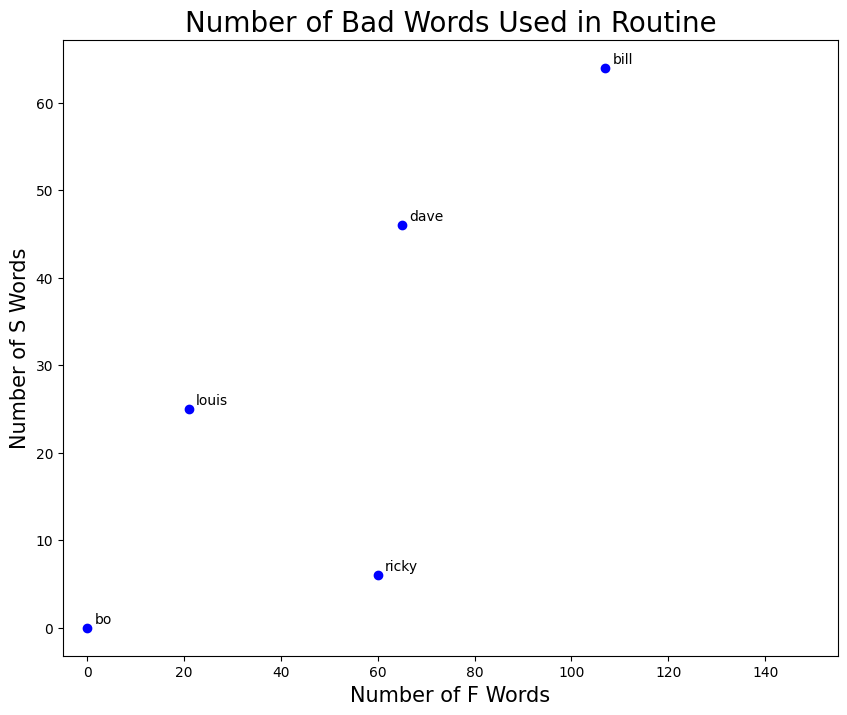

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Words', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Words Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ricky, my other favorite comedian is Louis.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

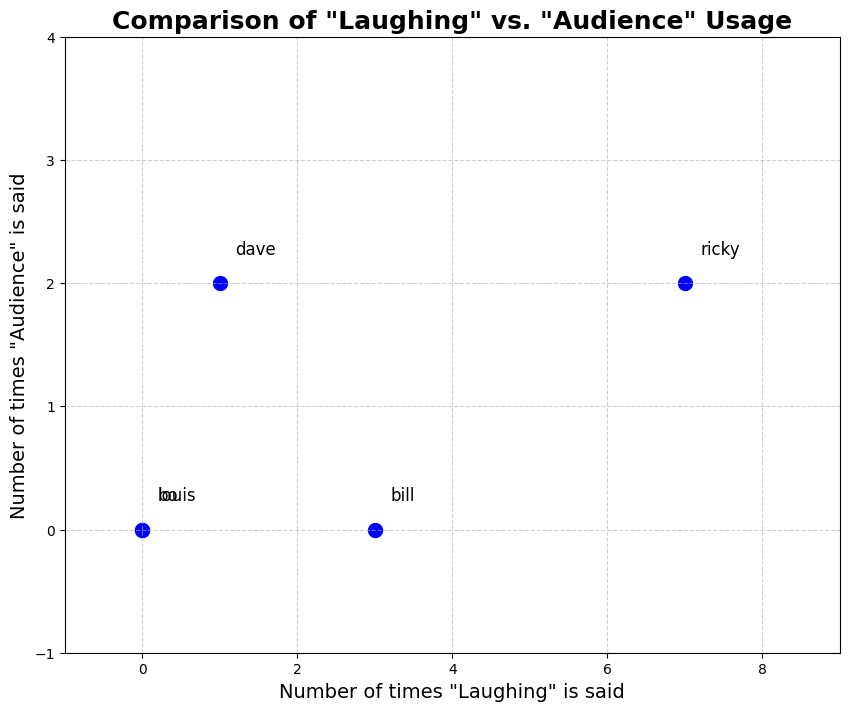

In [ ]:
import matplotlib.pyplot as plt

# Extract occurrences of "laughing" and "audience"
laugh_word = 'laughing'
audience_word = 'audience'

data_word_counts = data.transpose()[[laugh_word, audience_word]]
data_comparison = pd.concat([data_word_counts.iloc[:, 0], data_word_counts.iloc[:, 1]], axis=1)
data_comparison.columns = ['laughing', 'audience']

# Scatter plot settings
plt.rcParams['figure.figsize'] = [10, 8]

# Improved scatter plot
for i, comedian in enumerate(data_comparison.index):
    x = data_comparison.laughing.loc[comedian]
    y = data_comparison.audience.loc[comedian]
    plt.scatter(x, y, color='blue', s=100)  # Increase point size for visibility
    plt.text(x + 0.2, y + 0.2, full_names[i], fontsize=12, ha='left', va='bottom')  # Adjust text position

# Set limits to reduce white space
plt.xlim(-1, max(data_comparison.laughing) + 2)
plt.ylim(-1, max(data_comparison.audience) + 2)

# Titles and labels
plt.title('Comparison of "Laughing" vs. "Audience" Usage', fontsize=18, fontweight='bold')
plt.xlabel('Number of times "Laughing" is said', fontsize=14)
plt.ylabel('Number of times "Audience" is said', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)  # Add light grid for readability
plt.show()
